# PHYS 105: Computational Physics I

## In-Class Exercise 7.1

Damped Pendulum

Consider a particle moving under the influence of a restoring acceleration

$$
    -k sin(x),
$$

with  k = 1,  and that friction also acts, producing a force  

$$
    -\alpha v  
$$

that always opposes the motion. Note that the variable $x$ is angle, replacing $\theta$ in our earlier discussion. 

The particle starts with position  $x = 0$  and velocity  $v = 1$  at time  $t = 0$.

**Instructions**:

   * **Modify** the predictor-corrector template program (in the InClass web page) studied previously to now study the effect of friction on pendulum motion. 

   * Using a time step of  $dt = 0.01$,  **answer** the following questions for  $\alpha = 0, 0.1, 0.2, 0.5$, and $1.0$:

        * By what **factor** does the amplitude decrease per oscillation -- that is, what is the **ratio** of  $x$  from one maximum to the next?

          * Do this by looking for a change in velocity from positive to negative, and taking the maximum of the current and previous positions as good estimates of the maximum values.

          * Find at least three maxima so that you can calculate at least two maxima ratios.

   * By continuing to increase  $\alpha$  in small increments (by *trial and error* is ok) until the particle never quite returns to  $x = 0$,  **estimate** the value of the critical damping factor  $\alpha_c$,  beyond which oscillations cease.


a = 0

1: ratio factor = 1.0000009256764688
2: ratio factor = 0.9999924818796448

a = 0.1

1: ratio factor = 0.7299431823624432
2: ratio factor = 0.730023790207174

a = 0.2

1: ratio factor = 0.5316239891612825
2: ratio factor = 0.5317540704551836

a = 0.5

1: ratio factor = 0.19737362600145328
2: ratio factor = 0.19743316520792872

a = 1

1: ratio factor = 0.026570900124272864
2: ratio factor = 0.02657860423359304

a = 1.98


Final x = 5.598454662424702e-10
Critical dampening factor = 1.98
The graph does not go below zero


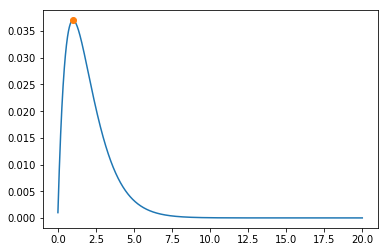

In [68]:
import sys, math
import matplotlib.pyplot as plt

# Global parameters.
a_list = [0,.1,.2,.5,1,1.98]
for alpha in a_list:
    a = alpha
    X0 = 0.0
    V0 = 0.1
    K  = 1.0
    DT = 0.01
    TMAX = 20.0

    amplitude = []
    time_amp = []
    time = []
    theta = []
    zeros_list = []


    #-------------------------------------------------------------------------

    def acc(x, v, t, a):
        return -K*math.sin(x) - a*v

    def potential(x):
        return K*(1-math.cos(x)) 

    def energy(x, v):
        return potential(x) + 0.5*v*v

    #-------------------------------------------------------------------------
    
    def interp(x0, y0, x1, y1, x=None, y=None):
        if y == None:
            return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
        elif x == None:
            return (y-y0) * (x1 - x0) / (y1 - y0) + x0

    def output(x, v, t):
        #print(t, x, v, energy(x, v) - E0)
        pass

    def time_to_stop(x, v, t, tmax):

        # Stopping condition.

        if t > tmax:
            return 1
        else:
            return 0

    def take_a_step(x, v, t, dt, alpha):

        # Take a single time step.

        a = acc(x, v, t, alpha)

        # Prediction:
        xp = x
        x += v*dt + 0.5*a*dt*dt
        v += a*dt
        t += dt

        # Correction:
        a1 = acc(x, v, t, alpha)
        v += 0.5*dt*(a1-a)

        af = acc(x, v, t, alpha)
        xf = x + v*dt + .5*af*dt*dt

        return x, xp, xf, v, t

    def check_amplitude(xp, x, xf, t):
    #     print('{:.5f} {:.5f} {:.5f}'.format(xp, x, xf))
        if (xp < x) and (xf <= x):
            amplitude.append(x)
            time_amp.append(t)
            #amplitude_time_list.append(t)
            
    def check_zero(xp, x, t):
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
        if (xp > 0) and (x <= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
            
    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    tmax = TMAX
    dt = DT

    E0 = energy(x, v)
    output(x, v, t)

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x,xp,xf,v,t) = take_a_step(x, v, t, dt, a)
        time.append(t)
        theta.append(x)
        check_amplitude(xp, x, xf, t)
        check_zero(xp, x, t)
        #output(x, v, t)
        
    print('\na = {}\n'.format(a))
    for i in range(len(amplitude)-1):
        factor = amplitude[i+1] / amplitude[i]
        print('{}: ratio factor = {}'.format(i+1, factor))

plt.plot(time, theta)
plt.plot(time_amp, amplitude, 'o')

print('\nFinal x = {}'.format(theta[-1]))
print('Critical dampening factor = {}'.format(a))
print('The graph {} go below zero'.format('does not' if len(zeros_list) == 0 else 'does'))